In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('railway.csv')

In [6]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [7]:
df.describe()

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


In [8]:
df.shape

(31653, 18)

In [9]:
df.sample()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
29485,ad86a4dc-1bfc-46ec-b4da,2024-04-22,11:16:48,Online,Credit Card,Disabled,Standard,Off-Peak,13,London Paddington,Reading,2024-04-22,12:45:00,13:45:00,13:45:00,On Time,NaN,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [11]:
df.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['Railcard'] = df['Railcard'].fillna('No card')

In [14]:
df.head(30)

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,No card,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,No card,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,No card,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No
5,4e1dcd88-3d95-44ef-99fa,2023-12-30,07:56:06,Online,Credit Card,No card,Standard,Advance,35,London Kings Cross,York,2024-01-01,06:15:00,08:05:00,08:05:00,On Time,NaN,No
6,1c74479d-85a4-4ba1-a607,2023-12-31,00:02:01,Station,Credit Card,Adult,Standard,Advance,2,London Euston,Oxford,2024-01-01,22:30:00,23:40:00,23:40:00,On Time,NaN,No
7,febf8dab-f808-46fa-bf2b,2023-12-31,01:35:18,Station,Contactless,Disabled,Standard,Advance,2,Liverpool Lime Street,Manchester Piccadilly,2024-01-01,00:00:00,00:30:00,00:30:00,On Time,NaN,No
8,01df916f-4291-41ec-a37d,2023-12-31,01:43:09,Station,Credit Card,No card,Standard,Advance,37,London Euston,York,2024-01-01,00:00:00,01:50:00,02:07:00,Delayed,Signal Failure,No
9,a8cedba7-1923-459d-b046,2023-12-31,03:05:52,Online,Credit Card,No card,Standard,Advance,13,London Paddington,Reading,2024-01-01,01:30:00,02:30:00,02:30:00,On Time,NaN,No


In [15]:
df["Journey Status"].value_counts()

Journey Status
On Time      27481
Delayed       2292
Cancelled     1880
Name: count, dtype: int64

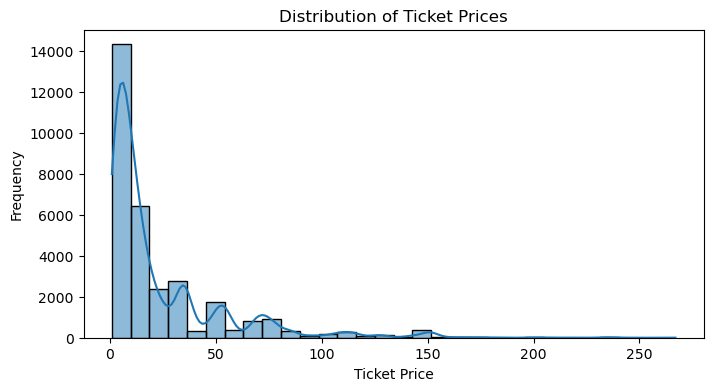

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Ticket Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6828\993020485.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sns.histplot(pd.to_datetime(df['Departure Time']).dt.hour, bins=23, kde=False)


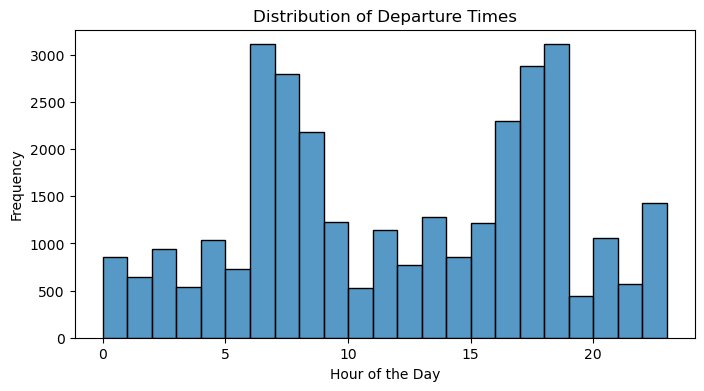

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(pd.to_datetime(df['Departure Time']).dt.hour, bins=23, kde=False)
plt.title('Distribution of Departure Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

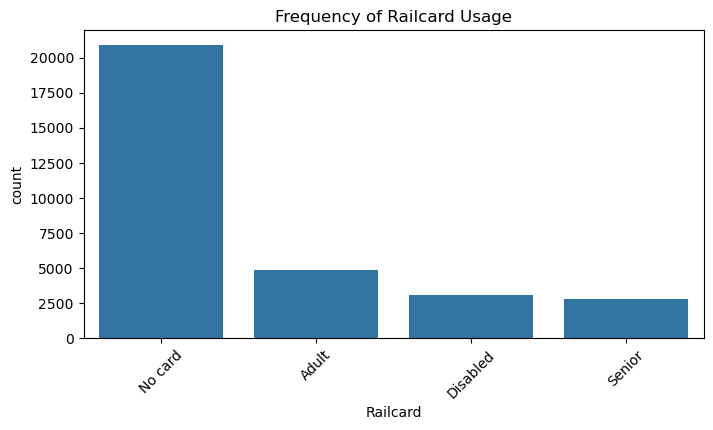

In [19]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Railcard', order=df['Railcard'].value_counts().index)
plt.title('Frequency of Railcard Usage')
plt.xticks(rotation=45)
plt.show()

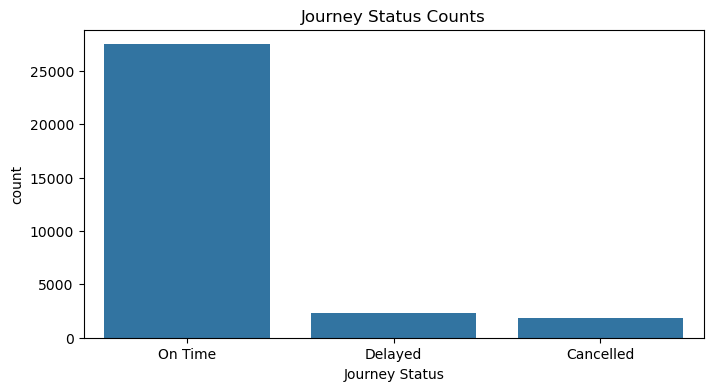

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Journey Status')
plt.title('Journey Status Counts')
plt.show()

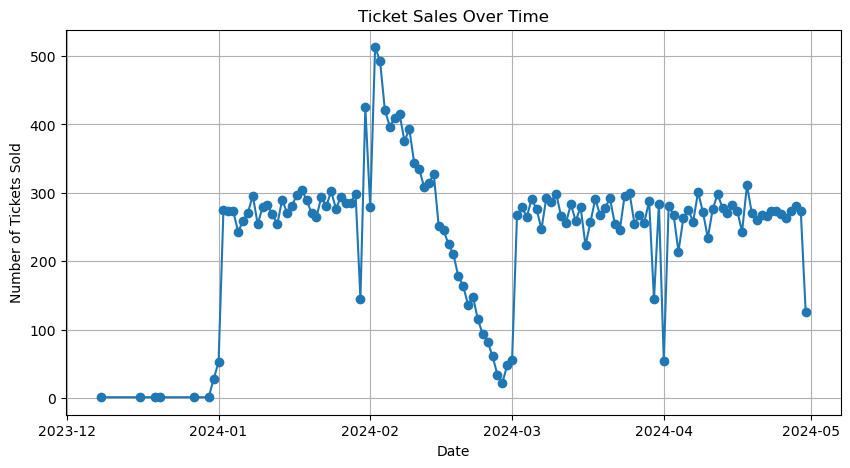

In [21]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
ticket_sales = df.groupby('Date of Purchase').size()

plt.figure(figsize=(10, 5))
plt.plot(ticket_sales.index, ticket_sales.values, marker='o')
plt.title('Ticket Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tickets Sold')
plt.grid()
plt.show()

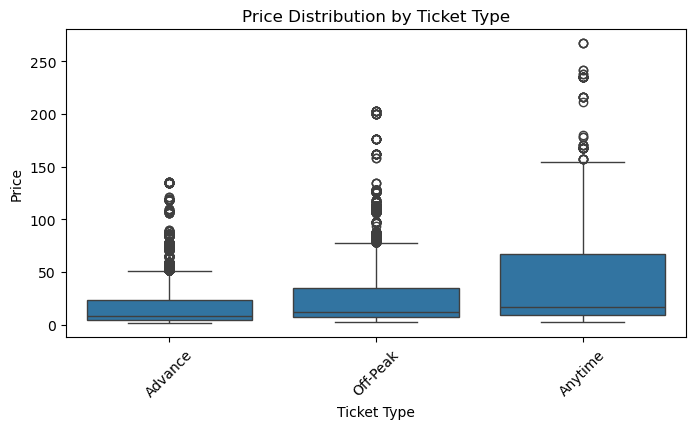

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Ticket Type', y='Price')
plt.title('Price Distribution by Ticket Type')
plt.xticks(rotation=45)
plt.show()

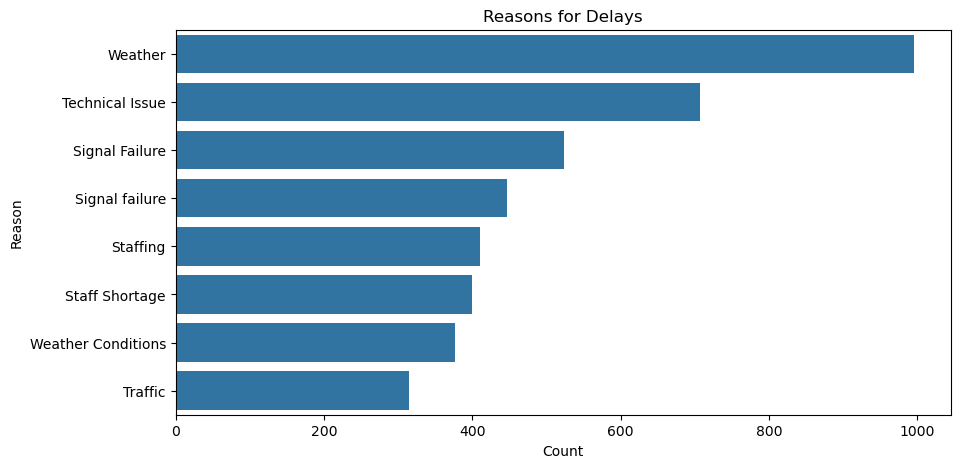

In [23]:
delay_reasons = df[df['Reason for Delay'] != 'No']
plt.figure(figsize=(10, 5))
sns.countplot(data=delay_reasons, y='Reason for Delay', order=delay_reasons['Reason for Delay'].value_counts().index)
plt.title('Reasons for Delays')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()

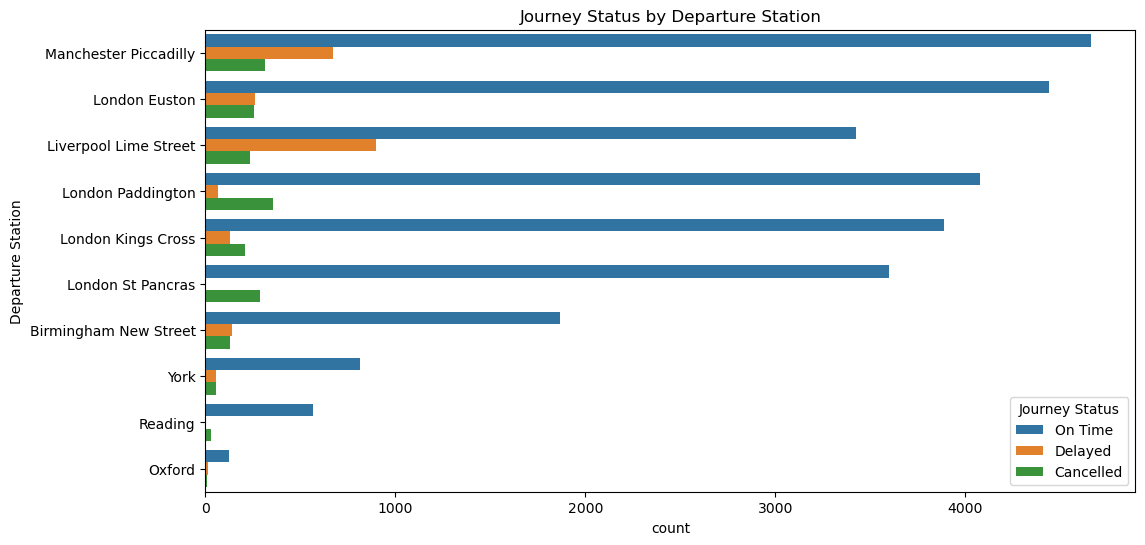

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Departure Station', hue='Journey Status', order=df['Departure Station'].value_counts().index[:10])
plt.title('Journey Status by Departure Station')
plt.show()

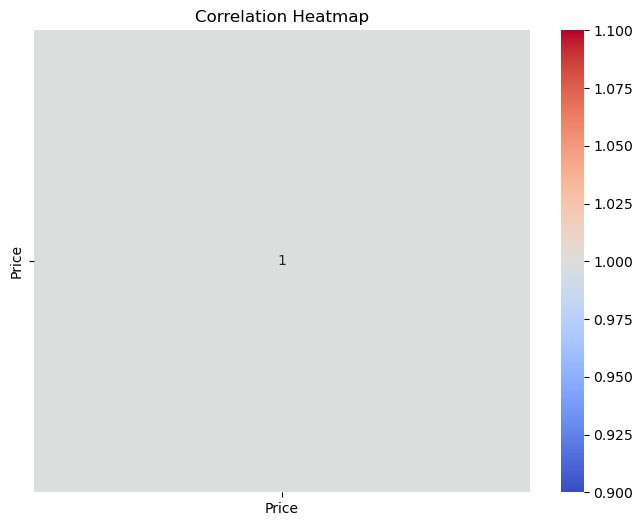

In [25]:
# has no meaning as we have only one numeric variable
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
df2 = pd.read_csv('DISTANCES.csv', index_col=0) 
df2.head()

,Birmingham New Street,London St Pancras,Manchester Piccadilly,Tamworth,Stafford,London Euston,Nuneaton,Reading,Liverpool Lime Street,Edinburgh,London Paddington,York,Coventry,London Kings Cross,Wolverhampton
Birmingham New Street,0.000000,223576.909293,117206.471692,29508.775510,43998.787416,223005.593522,48179.020859,153627.617614,158498.249763,412324.958556,219405.811256,189317.376528,43901.885965,224518.217677,28127.331273
London St Pancras,223576.909293,0.000000,318985.799941,212870.405922,263400.911824,842.373186,185796.047856,94207.312179,379834.648417,598490.586314,5832.933021,290767.013673,182321.776303,1063.604589,251668.818597
Manchester Piccadilly,117206.471692,318985.799941,0.000000,111344.496422,75893.233426,318589.452533,135796.175846,265085.460117,83489.769270,295222.336617,315974.951008,139737.111181,143466.210037,319771.283725,99961.176903
Tamworth,29508.775510,212870.405922,111344.496422,0.000000,51846.267944,212381.671766,27385.143000,153768.969201,167259.750616,404884.650625,209252.934019,162798.623081,32205.019309,213742.128827,49381.020981
Stafford,43998.787416,263400.911824,75893.233426,51846.267944,0.000000,262878.902683,79121.522497,197305.416161,116518.651952,369781.326320,259552.808392,174116.906509,81081.350088,264301.252234,24384.808121


,station,lat,long
0,Birmingham New Street,52.477646,-1.898694
1,London St Pancras,51.531286,-0.127105
2,Manchester Piccadilly,53.477420,-2.230833
3,Tamworth,52.637400,-1.687100
4,Stafford,52.803900,-2.122100


In [34]:
# Function to retrieve distance using matrix
def get_distance(row):
    try:
        # Use the departure and arrival stations to fetch the distance
        departure = row['Departure Station']  # Column with departure station in the original DataFrame
        arrival = row['Arrival Destination']  # Column with arrival station in the original DataFrame
        return df2.loc[departure, arrival]
    except KeyError:
        # If stations are not found, handle the error (e.g., return NaN or a default value)
        return None

# Apply the function to each row of the original DataFrame
df['Distance'] = df.apply(get_distance, axis=1)

# Save the updated DataFrame if necessary
df.to_csv('updated_dataframe.csv', index=False)

# Display the updated DataFrame
print(df.head())

            Transaction ID Date of Purchase Time of Purchase Purchase Type  \
0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   

  Payment Method Railcard Ticket Class Ticket Type  Price  \
0    Contactless    Adult     Standard     Advance     43   
1    Credit Card    Adult     Standard     Advance     23   
2    Credit Card  No card     Standard     Advance      3   
3    Credit Card  No card     Standard     Advance     13   
4    Contactless  No card     Standard     Advance     76   

       Departure Station    Arrival Destination Date of Journey  \
0      London Paddington  Liverpool Lime Street      2024-01-01   
1     London Kings Cross      

In [35]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Distance
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No,376037.457937
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,291159.570039
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,No card,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No,83489.769270
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,No card,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No,88481.419329
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,No card,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No,379321.739510


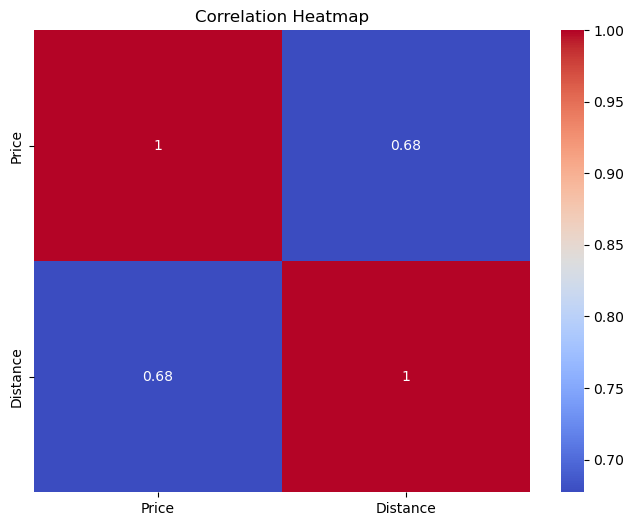

In [36]:
# has no meaning as we have only one numeric variable
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()